<a href="https://colab.research.google.com/github/Sabari-nath-p/pythonproject/blob/main/Naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/IRIS.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [4]:
df.drop(columns=["Id"],axis=1,inplace=True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#since the class label which is in object have to classify convet the object into values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [7]:
df['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


In [8]:
X=df.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y=df.iloc[:,-1]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X)
X=ss.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [13]:
from sklearn.neighbors import KNeighborsClassifier #import knnn already defined module
knn=KNeighborsClassifier(n_neighbors=3)#value of k
#now fit is used to connect coreesponding x1 and x2 to its y.matching
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [16]:
y_predict1=knn.predict(X_test)
y_predict1

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [17]:
y_test

,Species
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

1.0

In [19]:
y_predict=gnb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9666666666666667

In [20]:
y_predict=gnb.predict(X_test)
y_predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

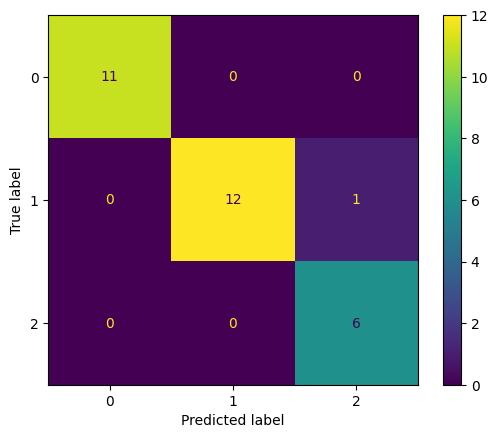

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
print(cm)

In [23]:
a=ss.transform([[5.1,3.4,1.4,0.2]])
a

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.90068117,  0.80065426, -1.3412724 , -1.31297673]])

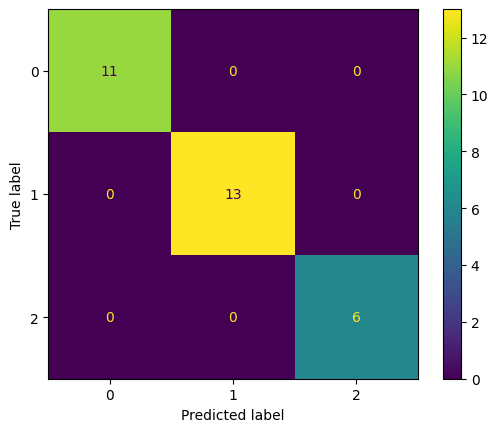

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_predict1)
print(cm)

In [24]:
new=gnb.predict(a)
new

array([0])

In [25]:
y_predict2=svc.predict(X_test)
y_predict2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict2)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict2)

0.9666666666666667

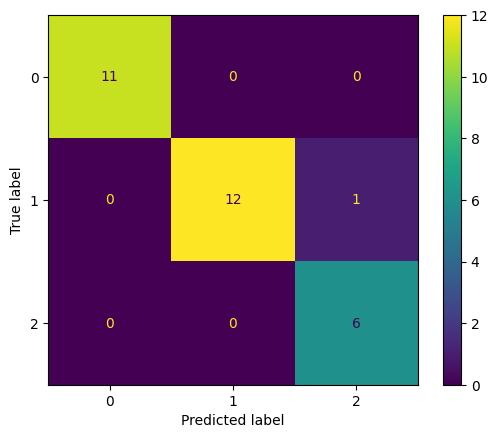

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_predict2)
print(cm)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

